# Data preparation

This program prepares data.

In [70]:
# import libraries

import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt

## Loading data

In [71]:
# Data is loaded in df. dataDir tell us folder of file.

dataDir = "../Data/Reims/"
df = pd.read_csv(dataDir + "170830-noheader.csv")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [72]:
# Data in list are unuseful so we can delete them. ALso data from CH21 to CH40 are unuseful.

list_unused = ["Logic", "Alarm1-10", "Alarm11-20", "Alarm21-30", "Alarm31-40", "AlarmLP", "AlarmOut"]

for element in list_unused:
    df.drop(element, 1, inplace=True)
    
for i in range(21, 41):
    df.drop("CH" + str(i), 1, inplace=True)

# In firs line we have units. We can delete them. 
df.drop(0, 0, inplace=True)

## Converting data

In [73]:
# Converting string to float.
df["ms"] = pd.to_numeric(df["ms"])

for i in range(1, 21):
    df["CH" + str(i)] = pd.to_numeric(df["CH" + str(i)])

In [74]:
# Converting time and apending milliseconds.
df["Date&Time"] = pd.to_datetime(df["Date&Time"], format="%Y-%m-%d %H:%M:%S")
df["Date&Time"] = pd.to_datetime(((df["Date&Time"].astype (np.int64) / 1000000).astype (np.int64) + df["ms"]), unit="ms")
df = df.set_index("Date&Time")


In [75]:
df_p = pd.DataFrame(df)[:60].copy(deep=True)

<IPython.core.display.Javascript object>


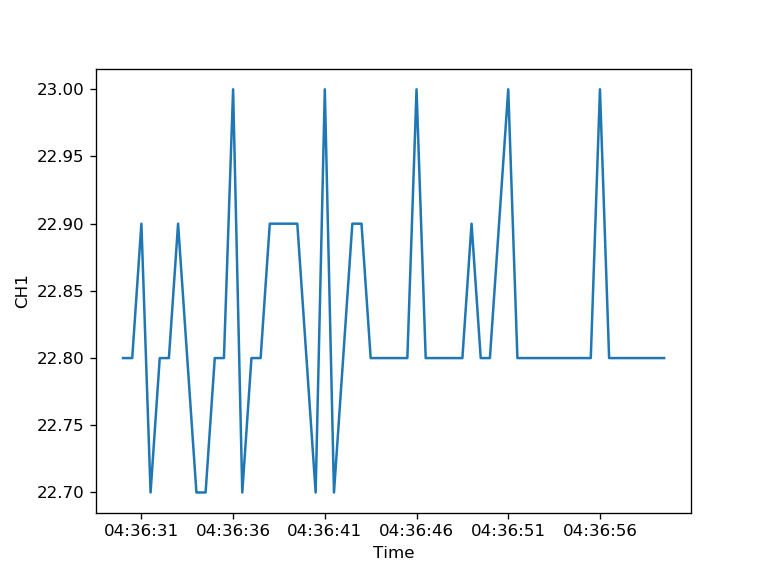

<IPython.core.display.Javascript object>


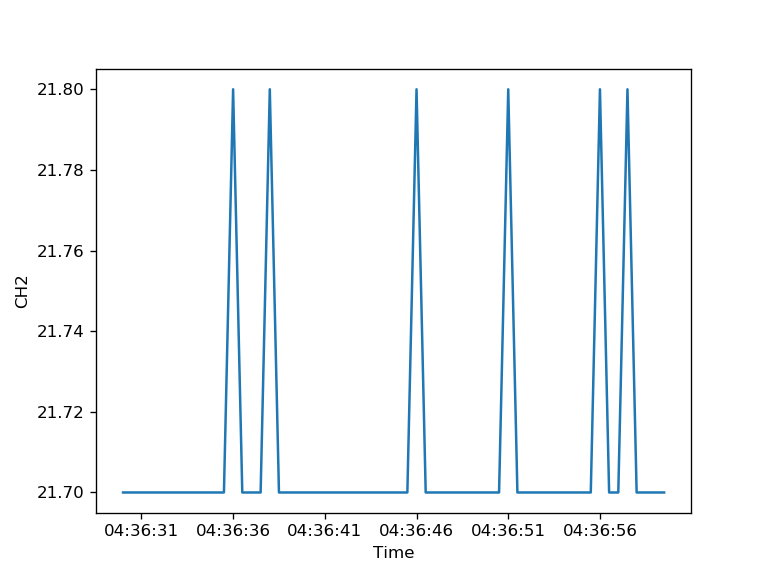

<IPython.core.display.Javascript object>


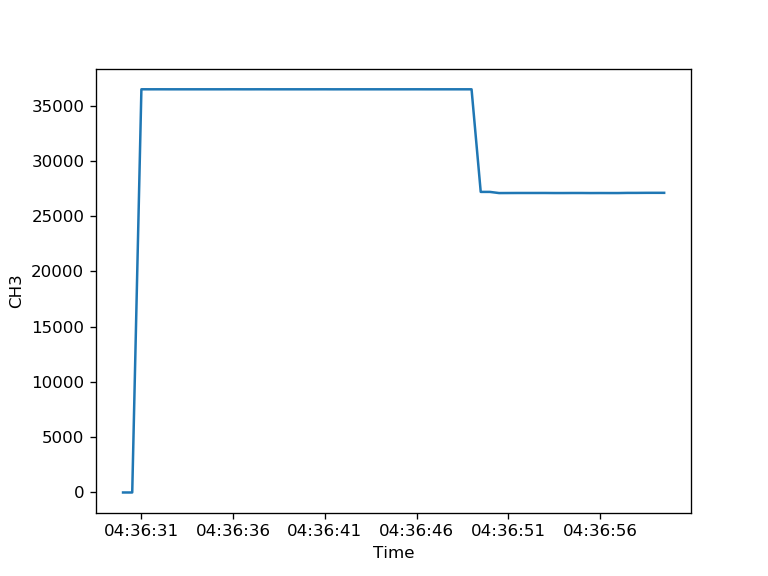

<IPython.core.display.Javascript object>


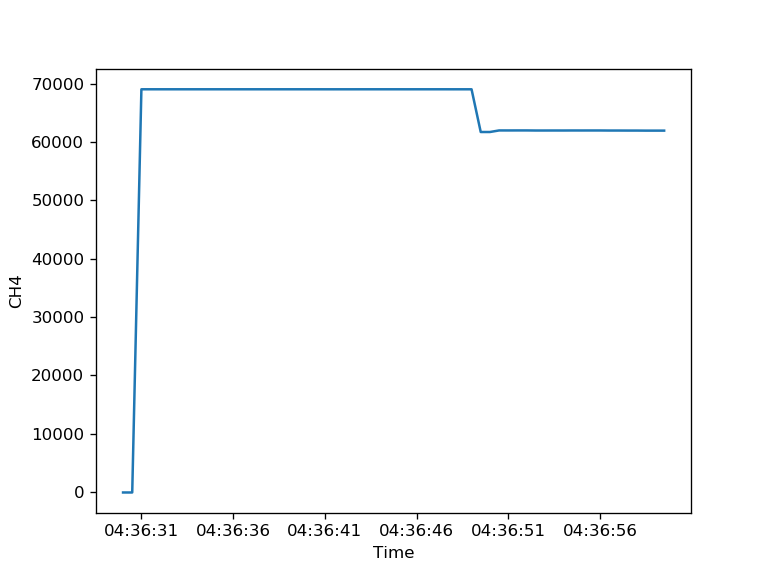

<IPython.core.display.Javascript object>


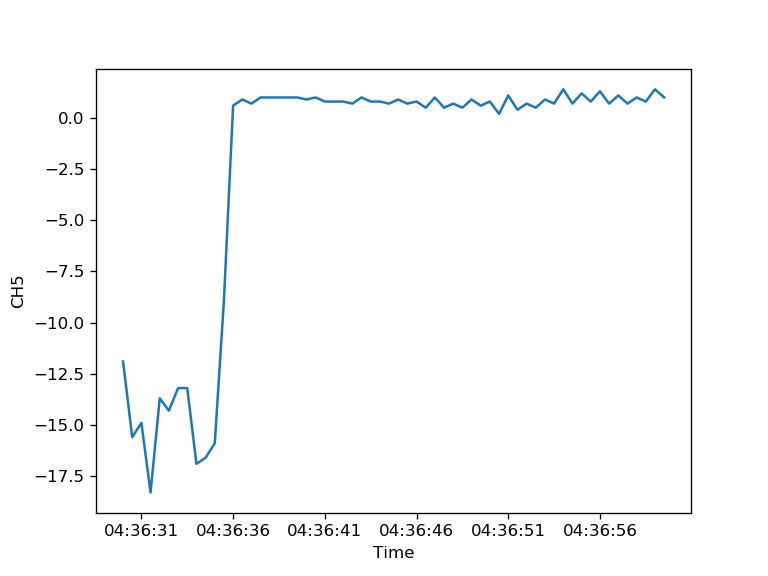

<IPython.core.display.Javascript object>


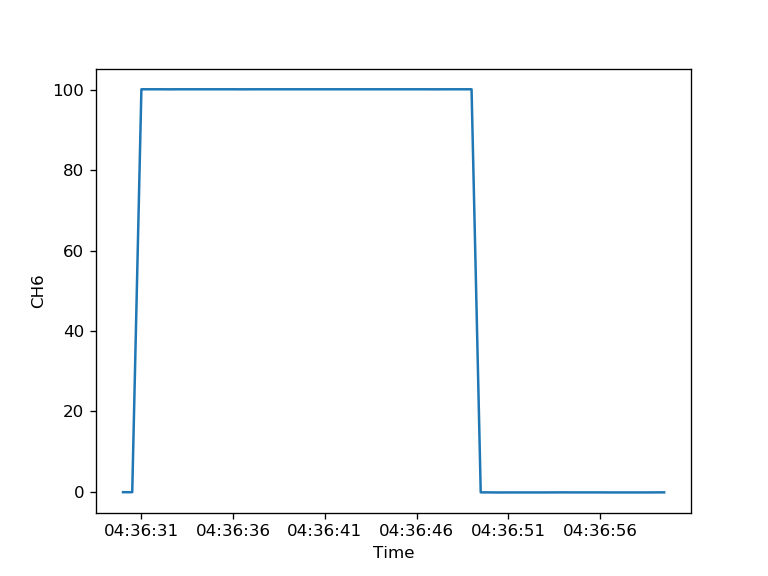

<IPython.core.display.Javascript object>


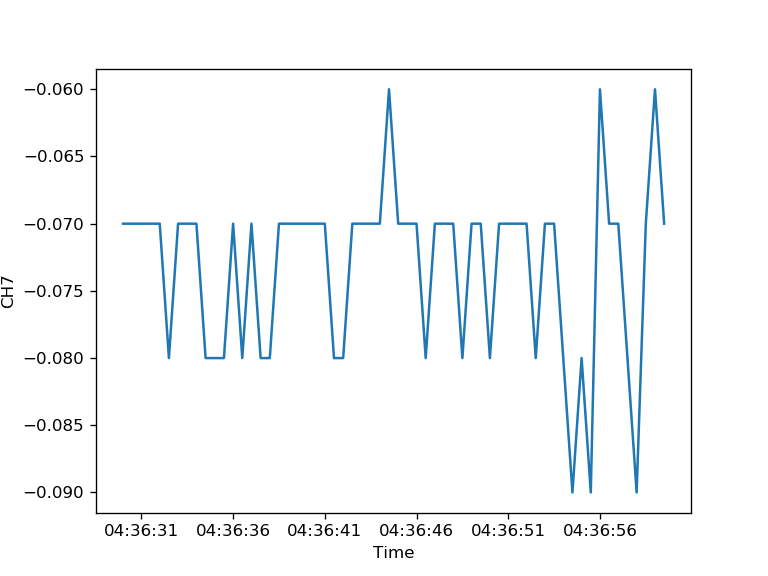

<IPython.core.display.Javascript object>


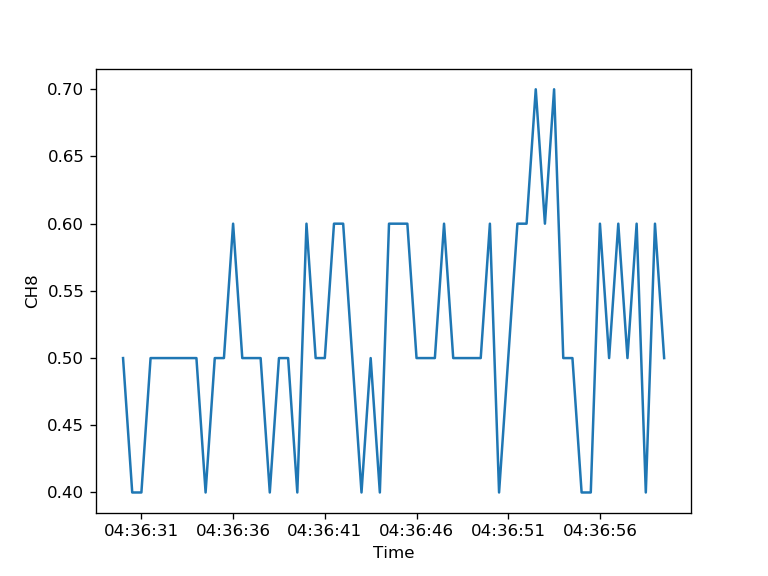

<IPython.core.display.Javascript object>


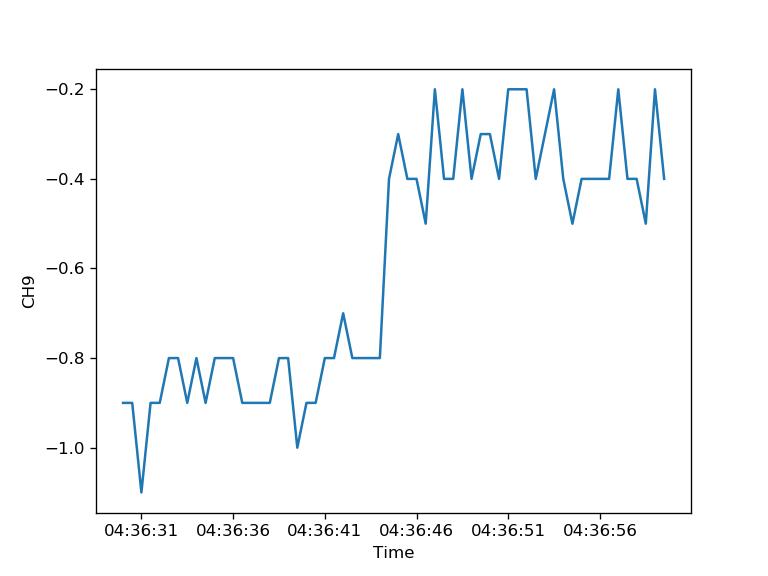

<IPython.core.display.Javascript object>


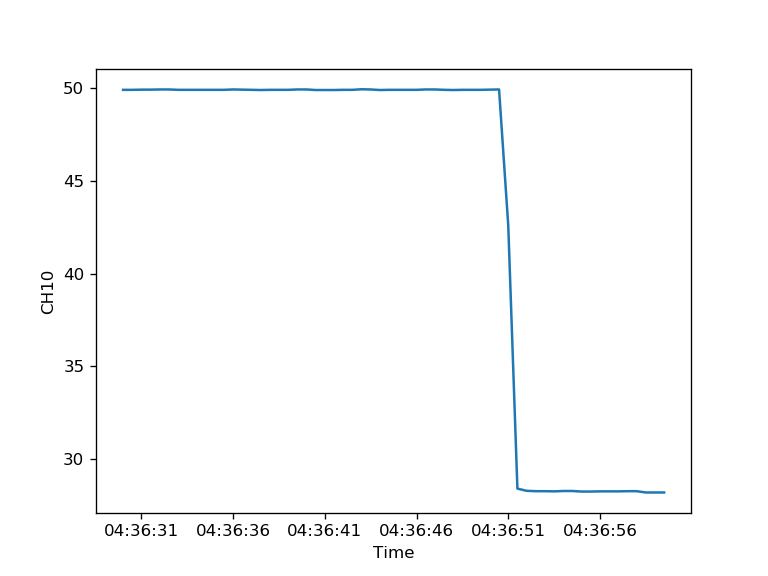

<IPython.core.display.Javascript object>


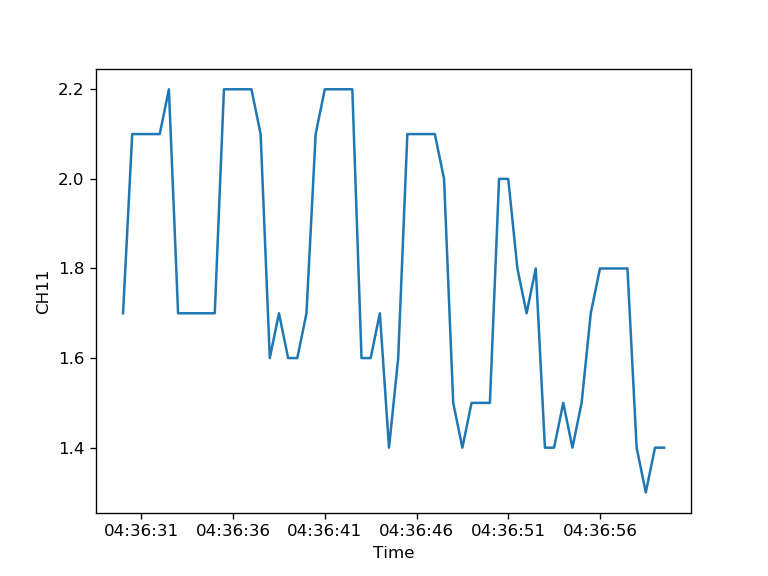

<IPython.core.display.Javascript object>


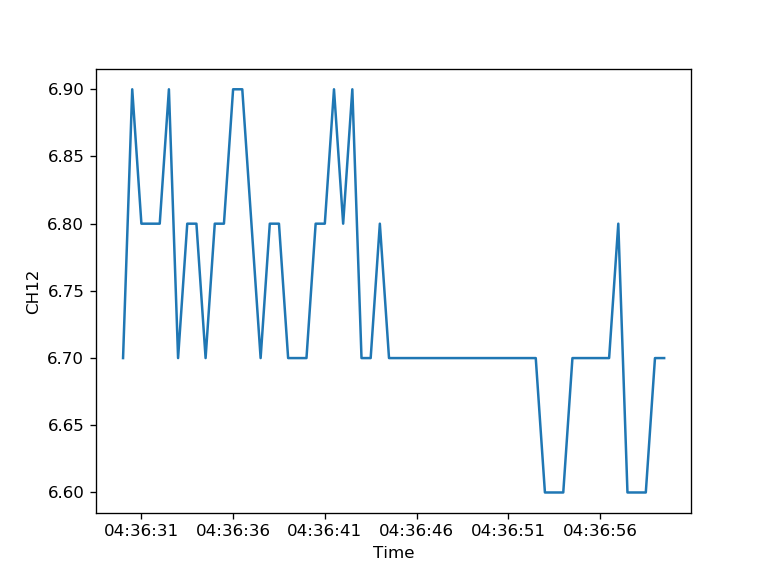

<IPython.core.display.Javascript object>


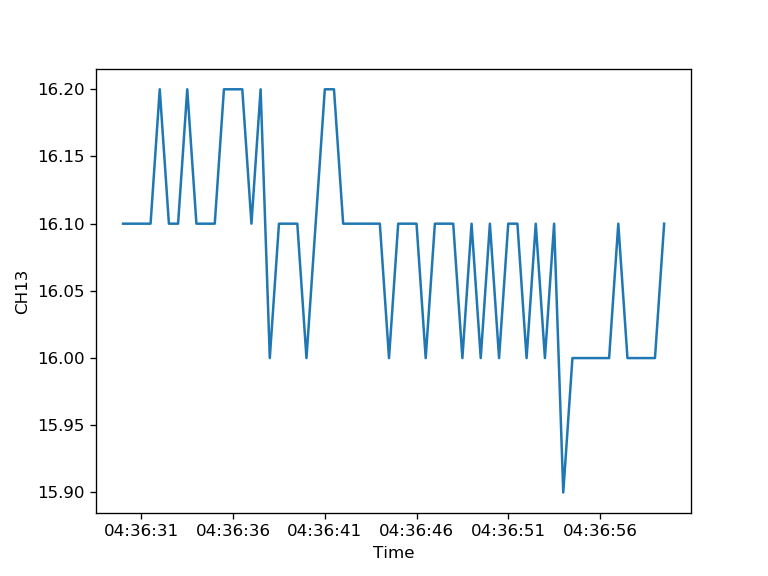

<IPython.core.display.Javascript object>


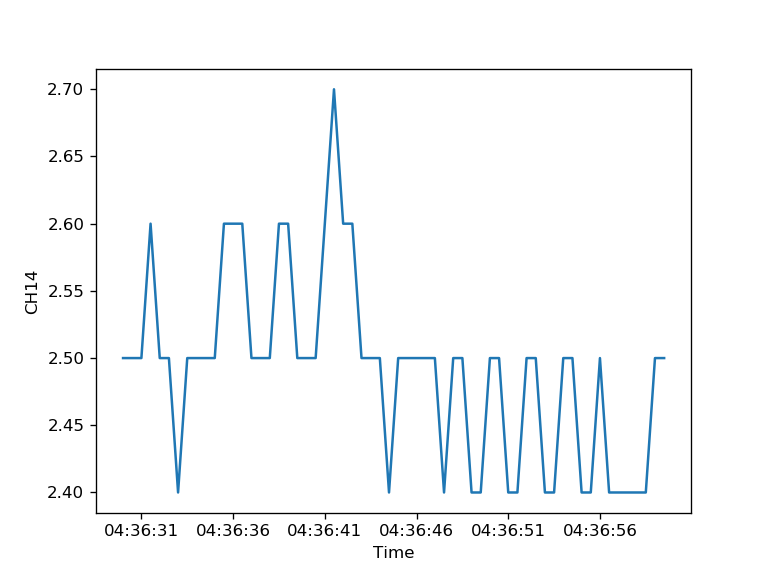

<IPython.core.display.Javascript object>


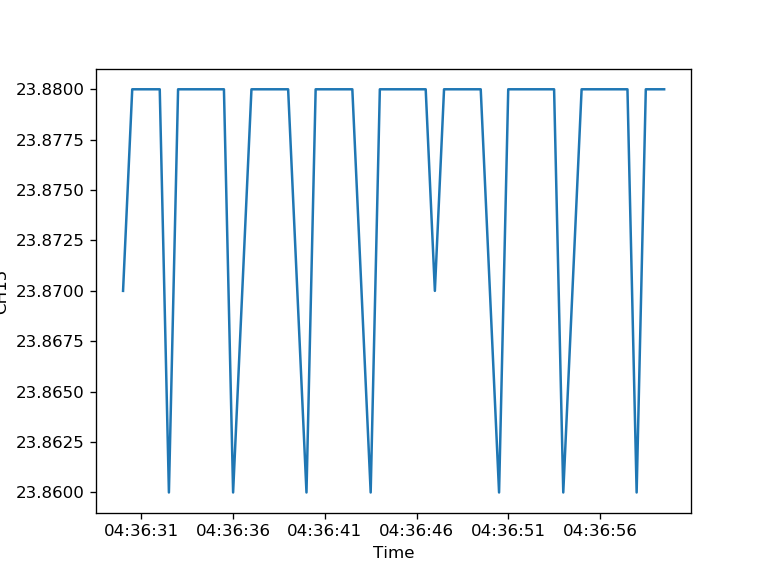

<IPython.core.display.Javascript object>


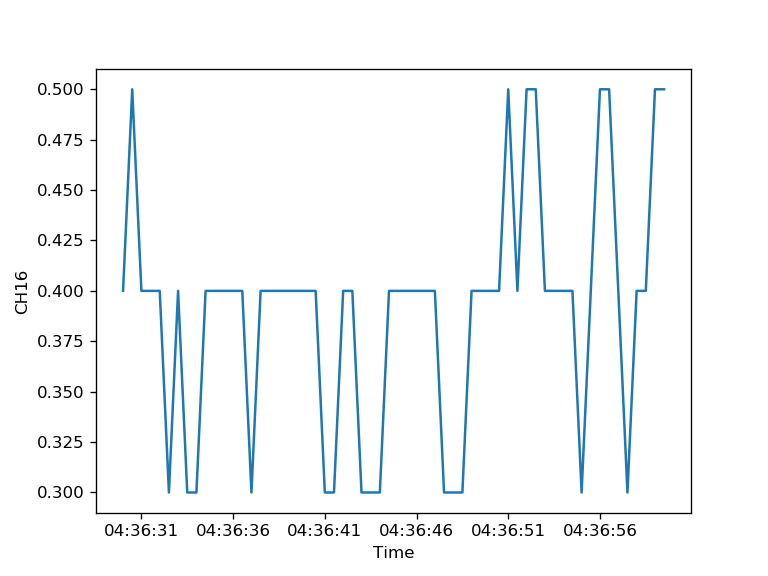

<IPython.core.display.Javascript object>


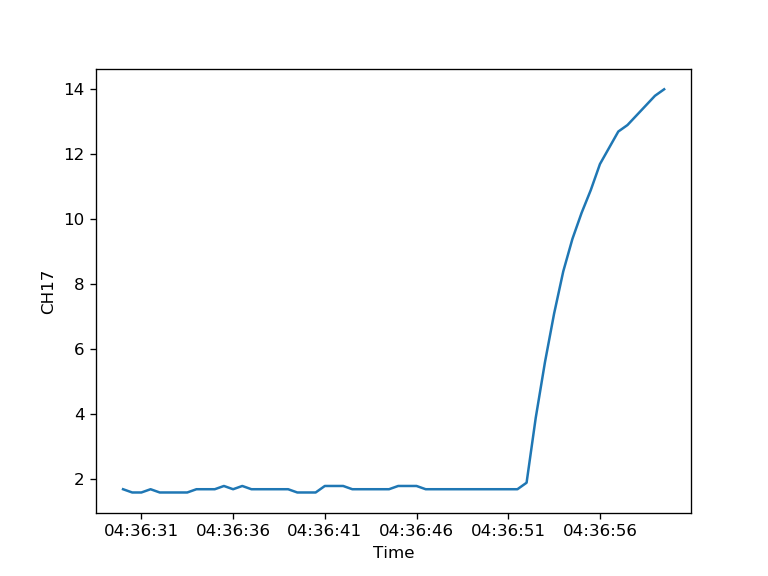

<IPython.core.display.Javascript object>


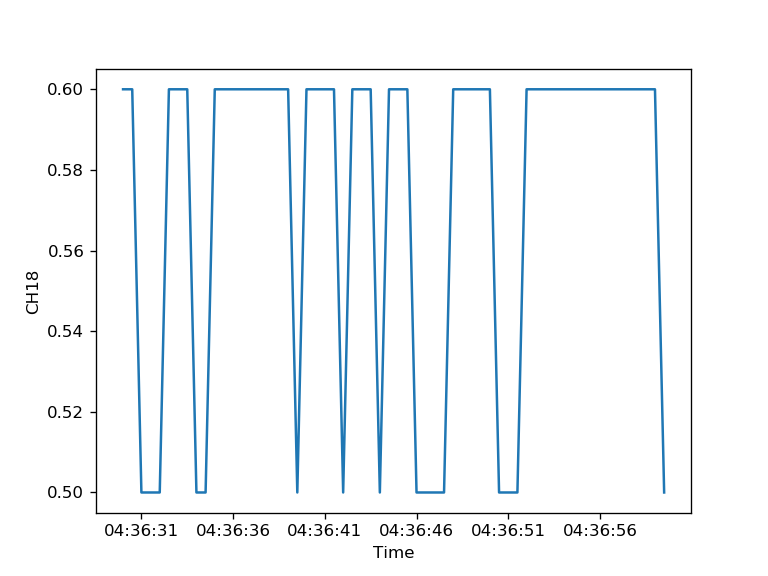

<IPython.core.display.Javascript object>


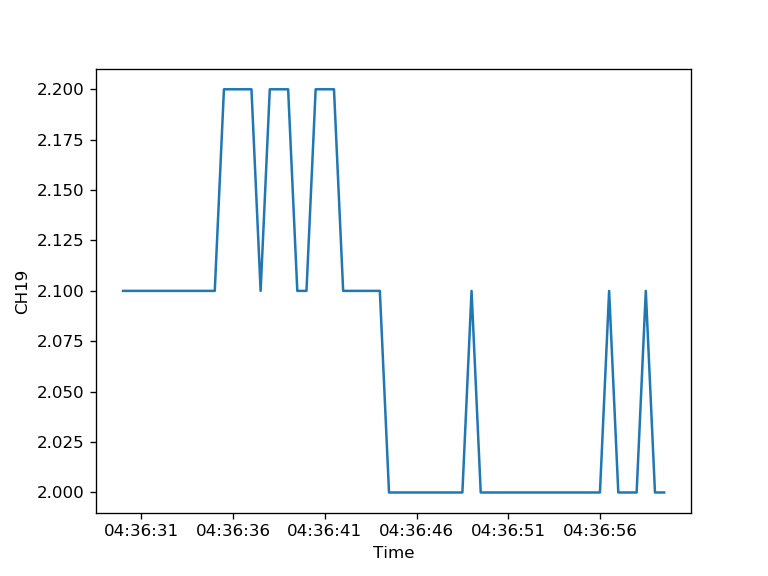

<IPython.core.display.Javascript object>


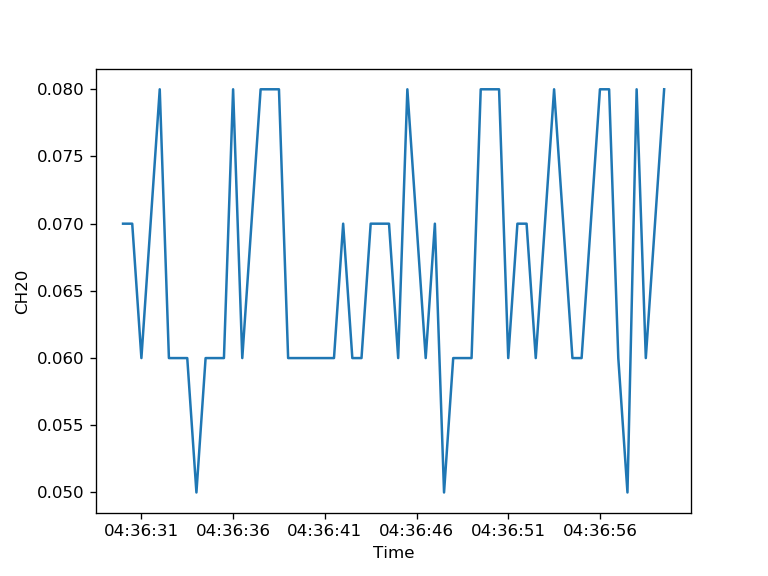

In [121]:
for i in range(1, 21):
    plt.figure(i)
    ime = "CH" + str(i)
    plt.ylabel(ime)
    plt.xlabel("Time")
    plt.plot(df_p[ime]);
    plt.show();
    
    plt.savefig(ime)

In [110]:
dict_offset = dict()

In [119]:
for i, mean in enumerate(df_p.mean()):
    dict_offset ["CH" + str(i + 1)] = mean

In [120]:
dict_offset

{'CH1': 2.057613151685202e+108,
 'CH10': 0.51500000000000012,
 'CH11': -0.59166666666666645,
 'CH12': 43.659666666666674,
 'CH13': 1.7900000000000007,
 'CH14': 6.7349999999999985,
 'CH15': 16.080000000000005,
 'CH16': 2.491666666666668,
 'CH17': 23.876500000000021,
 'CH18': 0.38999999999999996,
 'CH19': 3.9350000000000001,
 'CH2': 250.0,
 'CH20': 0.57333333333333381,
 'CH21': 2.0700000000000003,
 'CH22': 0.066833333333333342,
 'CH3': 22.823333333333309,
 'CH4': 21.710000000000019,
 'CH5': 32030.466666666667,
 'CH6': 64290.366666666669,
 'CH7': -2.2233333333333336,
 'CH8': 61.712166666666668,
 'CH9': -0.073166666666666644}